In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


### 1강 - 개발환경 구축하기

In [2]:
hello = tf.constant('Hello World!')
sess = tf.Session()
print(sess.run(hello))

b'Hello World!'


### 2강 - Linear regresion
주어진 데이터를 학습시켜서 가장 합리적인 '직선'을 찾아내는 것.<br>
따라서 데이터는 3개 이상일 때 의미가 있음.<br>
__Hypothesis(x) = W * x + b__
<img src="https://github.com/newhong-sci/2005_GS_deep-learning_basic/blob/master/img/200514_01.png?raw=true" width="400">

### 3강 - 비용(Cost)
__Cost__: 가설이 얼마나 정확한 지 판단하는 기준<br>
__Cost function__: (예측 값 - 실제 값)^2의 평균<br>
현재의 W, b 값과 데이터를 이용하면 비용 함수를 구할 수 있다.
비용 함수로 구한 비용이 적을 수록 좋다.
<img src="https://github.com/newhong-sci/2005_GS_deep-learning_basic/blob/master/img/200514_02.png?raw=true" width="300">
__Gradient Descent__:

### 4강 - Linear regression 구현

In [3]:
# Make input data
xData = [1, 2, 3, 4, 5, 6, 7]
yData = [25000, 55000, 75000, 110000, 128000, 155000, 180000]
# Set the randome weight and bias
W = tf.Variable(tf.random_uniform([1], -100, 100))
b = tf.Variable(tf.random_uniform([1], -100, 100))
# Placeholder
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# Make Linear regression graph
H = W * X + b
# Set the cost
cost = tf.reduce_mean(tf.square(H - Y))
# Set the ML option
gd = tf.Variable(0.01)
optimizer = tf.train.GradientDescentOptimizer(gd)
train = optimizer.minimize(cost)
init = tf.global_variables_initializer() # 변수 초기화
sess = tf.Session()
# Train the model
sess.run(init) #초기화
for i in range(5001):
    sess.run(train, feed_dict={X: xData, Y: yData})
    if i % 500 == 0:
        print(i, sess.run(cost, feed_dict={X: xData, Y: yData}), sess.run(W), sess.run(b))
# Predict the score
print(sess.run(H, feed_dict={X: [8]}))

0 4572570600.0 [10409.206] [2066.559]
500 8686757.0 [25537.84] [1948.612]
1000 8633804.0 [25627.553] [1504.3536]
1500 8632681.0 [25640.627] [1439.6195]
2000 8632659.0 [25642.533] [1430.1809]
2500 8632648.0 [25642.807] [1428.8192]
3000 8632651.0 [25642.844] [1428.6328]
3500 8632656.0 [25642.848] [1428.6133]
4000 8632656.0 [25642.848] [1428.6133]
4500 8632656.0 [25642.848] [1428.6133]
5000 8632656.0 [25642.848] [1428.6133]
[206571.39]


### 6강 - 변수와 상수 (variable and constant)

In [4]:
# Constant
a = tf.constant(1)
b = tf.constant(2)
c = tf.add(a, b)
sess = tf.Session()
sess.run(c)

3

In [5]:
# Variable
a = tf.Variable(1)
b = tf.Variable(2)
c = tf.add(a, b)
# Different part with Constant
init = tf.global_variables_initializer() # 초기화를 위해
sess = tf.Session()
sess.run(init)
sess.run(c)

3

In [6]:
# Change variable
d = tf.Variable(3)
e = tf.add(d, b)
init = tf.global_variables_initializer()
sess.run(init)
sess.run(c)

3

### 7강 - Placeholder
다른 tensor를 할당하기 위해 사용 __(Fedding)__<br>
학습 데이터를 포함하는 변수라 할 수 있다.<br>
<img src="https://github.com/newhong-sci/2005_GS_deep-learning_basic/blob/master/img/200514_03.png?raw=true">
입력값과 수식을 분리함으로써 보다 간다하게 데이터를 학습한다.??<br><br>
__Format = tf.placeholder(dtype, shape, name)__

In [7]:
input = [1, 2, 3, 4, 5]
x = tf.placeholder(dtype=tf.float32)
y = x + 5
# 실행해보기
sess = tf.Session()
sess.run(y, feed_dict={x: input}) # feeding작업을 통해 tensor & placeholder 연결

array([ 6.,  7.,  8.,  9., 10.], dtype=float32)

In [8]:
mathScore = [85, 99, 84, 97, 92]
englishScore = [59, 80, 84, 68, 77]
a = tf.placeholder(dtype=tf.float32)
b = tf.placeholder(dtype=tf.float32)
y = (a + b)/2

sess = tf.Session()
print(sess.run(y, feed_dict={a: mathScore, b: englishScore}))

[72.  89.5 84.  82.5 84.5]


### 8강 - Tensorflow 기본 함수
Ref: [Blog_basic_func](https://blog.naver.com/ndb796/221278027853)
<img src="https://github.com/newhong-sci/2005_GS_deep-learning_basic/blob/master/img/200514_04.png?raw=true" width="600">

In [9]:
a = tf.constant(17.5)
b = tf.constant(5.0)

In [10]:
sess = tf.Session()
add = tf.add(a, b)
sess.run(add)

22.5

In [11]:
sub = tf.subtract(a, b)
sess.run(sub)

12.5

In [12]:
mul = tf.multiply(a, b)
sess.run(mul)

87.5

In [13]:
div = tf.truediv(a, b)
sess.run(div)

3.5

In [14]:
mod = tf.mod(a, b)
sess.run(mod)

2.5

In [15]:
tfabs = tf.abs(-a)
sess.run(tfabs)

17.5

In [16]:
neg = tf.negative(a)
sess.run(neg)

-17.5

In [17]:
sign = tf.sign(a)
sess.run(sign)

1.0

In [18]:
squ = tf.square(a)
sess.run(squ)

306.25

In [19]:
pow = tf.pow(a, 2)
sess.run(pow)

306.25

In [20]:
max = tf.maximum(a, b)
sess.run(max)

17.5

In [21]:
exp = tf.exp(a)
sess.run(exp)

39824784.0

In [22]:
log = tf.log(a)
sess.run(log)

2.862201

### 9강 - 아키텍처(Architecture)
Ref: [Blog_system_architecture](https://blog.naver.com/ndb796/221278027853)<br><br>
1) 클라이언트 (Client)<br>
2) 분산된 마스터 (Distributed master)<br>
3) 작업자 서비스 (Worker Services)<br>
4) 커널 기능 (Kernel Implementations)<br>
<img src="https://github.com/newhong-sci/2005_GS_deep-learning_basic/blob/master/img/200514_05.png?raw=true" width="600">

### 10강 - 세션(Session)
Ref: [Blog_Session](https://blog.naver.com/ndb796/221278249999)<br>
아래 작업은 계산을 수행한것이 아닌 그래프를 만든 작업<br>
그래프를 만들고 Session을 통해 계산 수행.
<img src="https://github.com/newhong-sci/2005_GS_deep-learning_basic/blob/master/img/200514_06.png?raw=true" width="300">
<br>
__즉, Session이란 실제로 값을 대입한 그래프가 동작하도록 하는 역할을 수행하는 것__

In [23]:
a = tf.constant(17.5)
b = tf.constant(5.0)
c = tf.add(a, b)
print(c)
# Tensorflow에서 데이터의 처리 단위는 Tensor이기 때문에 출력값은 일종의 다차원 배열의 객체라고 이해할 수 있다.

Tensor("Add_7:0", shape=(), dtype=float32)


### 11강 - K means 개요
Ref: [Blog_Kmeans](https://blog.naver.com/PostView.nhn?blogId=ndb796&logNo=221278300442&parentCategoryNo=&categoryNo=83&viewDate=&isShowPopularPosts=false&from=postView)<br>
Clustering (Unsupervised learning)<br>
<img src="https://github.com/newhong-sci/2005_GS_deep-learning_basic/blob/master/img/200514_07.png?raw=true" width="600">
1. 임의 cluster에 가장 가까운 점 선택 (Kmean++은 처음 cluster 지점을 정할 때 거리가 가장 먼 점들을 기준으로 진행함.)
2. 선택된 점들을 중심으로 cluster의 중심을 옮김
3. 1-2번을 여러번 반복하여 최적의 cluster 중심을 찾는다.

### 12강 - Kmeans 구현하기
Ref: [Blog_Kmeans구현](https://blog.naver.com/PostView.nhn?blogId=ndb796&logNo=221278329032&parentCategoryNo=&categoryNo=83&viewDate=&isShowPopularPosts=false&from=postView)<br>

In [24]:
from sklearn.cluster import KMeans

In [25]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df = pd.DataFrame(columns = ['x', 'y'])

df.loc[0] = [2,3]
df.loc[1] = [2,11]
df.loc[2] = [2,18]
df.loc[3] = [4,5]
df.loc[4] = [4,7]
df.loc[5] = [5,3]
df.loc[6] = [5,15]
df.loc[7] = [6,6]
df.loc[8] = [6,8]
df.loc[9] = [6,9]
df.loc[10] = [7,2]
df.loc[11] = [7,4]
df.loc[12] = [7,5]
df.loc[13] = [7,17]
df.loc[14] = [7,18]
df.loc[15] = [8,5]
df.loc[16] = [8,4]
df.loc[17] = [9,10]
df.loc[18] = [9,11]
df.loc[19] = [9,15]
df.loc[20] = [9,19]
df.loc[21] = [10,5]
df.loc[22] = [10,8]
df.loc[23] = [10,18]
df.loc[24] = [12,6]
df.loc[25] = [13,5]
df.loc[26] = [14,11]
df.loc[27] = [15,6]
df.loc[28] = [15,18]
df.loc[29] = [18,12]

df

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7
5,5,3
6,5,15
7,6,6
8,6,8
9,6,9


Text(0.29999999999999716, 0.5, 'y')

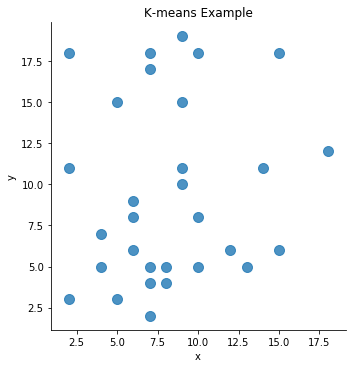

In [27]:
sb.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={"s": 100})
plt.title('K-means Example')
plt.xlabel('x')
plt.ylabel('y')

In [28]:
points = df.values # pandas to numpy
kmeans = KMeans(n_clusters = 4).fit(points)
kmeans.cluster_centers_

array([[ 6.18181818,  4.45454545],
       [ 7.        ,  9.5       ],
       [ 8.        , 17.25      ],
       [14.4       ,  8.        ]])

In [29]:
kmeans.labels_

array([0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0,
       1, 2, 3, 3, 3, 3, 2, 3])

In [30]:
df['cluster'] = kmeans.labels_
df.head(30)

,x,y,cluster
0,2,3,0
1,2,11,1
2,2,18,2
3,4,5,0
4,4,7,0
5,5,3,0
6,5,15,2
7,6,6,0
8,6,8,1
9,6,9,1


Text(0.5, 1, 'K-means Example')

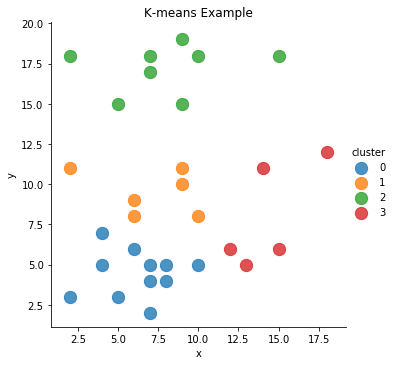

In [31]:
sb.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={"s": 150}, hue="cluster")
plt.title('K-means Example')